In [552]:
import pandas as pd
import itertools
import folium
from pyproj import Transformer, transform
import time
import numpy as np
import matplotlib.pyplot as plt

# espg:4326 -> espg:5186 -> Grid -> espg:4326

In [553]:

transformer = Transformer.from_crs("epsg:4326", "epsg:5186")
transformer_5186_4326 = Transformer.from_crs("epsg:5186", "epsg:4326")

p_4326 = (1.153828, 103.569563) # 구글 지도 보고 적당히 고른 서남단 좌표.
p_y_5186, p_x_5186 = transformer.transform(p_4326[0], p_4326[1])
meters = 1000 # 1km
n1 = 60000//meters # 60km
n2 = 40000//meters # 40km

m = folium.Map(location=(p_4326[0], p_4326[1]), zoom_start=11) # folium.Map 은 (lat, lng) 로 location 을 받음에 유의!
df = pd.DataFrame(columns=['idx', 'll','rl','ru','lu'])

idx=0
for x, y in itertools.product(range(n2), range(n1)):
    grid_lower_l = transformer_5186_4326.transform(p_y_5186 + (x + 0) * meters, p_x_5186 + (y + 0) * meters)
    grid_lower_r = transformer_5186_4326.transform(p_y_5186 + (x + 1) * meters, p_x_5186 + (y + 0) * meters)
    grid_upper_r = transformer_5186_4326.transform(p_y_5186 + (x + 1) * meters, p_x_5186 + (y + 1) * meters)
    grid_upper_l = transformer_5186_4326.transform(p_y_5186 + (x + 0) * meters, p_x_5186 + (y + 1) * meters)
    
    df = df.append(pd.DataFrame([[ [x,y] , grid_lower_l[0] , grid_lower_r[1] , grid_upper_r[1] , grid_upper_r[0]]] , columns=['idx', 'll','rl','ru','lu']), ignore_index=True)
    idx+=1
                                                                 
    folium.PolyLine([grid_lower_l,grid_upper_l], color="black", weight=5, opacity=0.5).add_to(m)
    folium.PolyLine([grid_lower_l,grid_lower_r], color="red", weight=5, opacity=0.5).add_to(m)

/tmp/ipykernel_217747/4249072613.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([[ [x,y] , grid_lower_l[0] , grid_lower_r[1] , grid_upper_r[1] , grid_upper_r[0]]] , columns=['idx', 'll','rl','ru','lu']), ignore_index=True)
/tmp/ipykernel_217747/4249072613.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([[ [x,y] , grid_lower_l[0] , grid_lower_r[1] , grid_upper_r[1] , grid_upper_r[0]]] , columns=['idx', 'll','rl','ru','lu']), ignore_index=True)
/tmp/ipykernel_217747/4249072613.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([[ [x,y] , grid_lower_l[0] , grid_lower_r[1] , grid_upper_r[1] , grid_upper_r[0]]] , columns=['idx', 'll'

In [504]:
df

idx        ll          rl          ru        lu
0       [0, 0]  1.153828  103.569491   103.57773  1.162194
1       [0, 1]    1.1539   103.57773   103.58597  1.162267
2       [0, 2]  1.153973   103.58597   103.59421   1.16234
3       [0, 3]  1.154045   103.59421   103.60245  1.162412
4       [0, 4]  1.154118   103.60245  103.610692  1.162485
...        ...       ...         ...         ...       ...
2395  [39, 55]  1.482304  104.020236  104.028504  1.490717
2396  [39, 56]  1.482395  104.028504  104.036773  1.490808
2397  [39, 57]  1.482487  104.036773  104.045042    1.4909
2398  [39, 58]  1.482578  104.045042  104.053312  1.490992
2399  [39, 59]  1.482669  104.053312  104.061583  1.491084

[2400 rows x 5 columns]

In [503]:
m.save("Singapore_Grid"+str(meters)+".html")
m

# Dataframe

In [505]:
station_raw = pd.read_csv('./Data/Singapore/bike_trips.csv')

k=[]
for i in range(0,301740):
    k.append(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(station_raw.iloc[i]['time_stamp_ori']))) 

station_raw['time_stamp_ori']=k
station_raw

bike_id       time_stamp_ori  time_stamp_dst        lng0      lat0  \
0         10712  2017-09-14 14:16:33      1505366520  103.641586  1.335649   
1         21517  2017-09-11 08:07:26      1505085748  103.745061  1.347460   
2         21517  2017-09-12 23:39:18      1505227289  103.746032  1.347189   
3         21517  2017-09-13 06:49:58      1505253328  103.745603  1.345680   
4         21517  2017-09-14 08:07:56      1505344240  103.748720  1.348492   
...         ...                  ...             ...         ...       ...   
301735     3113  2017-09-14 20:26:37      1505388569  103.885917  1.360959   
301736     3113  2017-09-14 20:31:58      1505388847  103.884426  1.360316   
301737     3113  2017-09-14 22:34:08      1505396686  103.885148  1.360353   
301738     3113  2017-09-15 23:32:20      1505486297  103.891475  1.362705   
301739     3113  2017-09-16 20:37:56      1505562219  103.892194  1.361301   

              lng1      lat1  
0       103.643479  1.333943  
1       103.745769  1.346230  
2       103.745603  1.345680  
3       103.748290  1.348048  
4       103.746627  1.346105  
...            ...       ...  
301735  103.884426  1.360316  
301736  103.885917  1.360959  
301737  103.890934  1.361318  
301738  103.891155  1.361030  
301739  103.890828  1.361249  

[301740 rows x 7 columns]

In [551]:

df_m = station_raw
df_m['time_stamp_ori'] = pd.to_datetime(df_m['time_stamp_ori'])
query_month = 9
query_day = 13
df_m = df_m.query('time_stamp_ori.dt.month == @query_month')
df_m = df_m.query('time_stamp_ori.dt.day == @query_day')
df_m.reset_index(drop=True, inplace=True)

maxlen_m =df_m.shape[0]



In [508]:
df_m


bike_id      time_stamp_ori  time_stamp_dst        lng0      lat0  \
0        21517 2017-09-13 06:49:58      1505253328  103.745603  1.345680   
1        19733 2017-09-13 13:23:38      1505276951  103.809950  1.462499   
2        13644 2017-09-13 20:11:31      1505301246  103.859909  1.319237   
3        13644 2017-09-13 23:11:52      1505312208  103.861629  1.317660   
4        23895 2017-09-13 16:32:54      1505288125  103.775216  1.378557   
...        ...                 ...             ...         ...       ...   
42867     3113 2017-09-13 16:02:56      1505286511  103.886250  1.360959   
42868     3113 2017-09-13 16:31:34      1505288045  103.884792  1.361445   
42869     3113 2017-09-13 19:59:21      1505300524  103.884407  1.360457   
42870     3113 2017-09-13 22:49:29      1505310941  103.886092  1.360187   
42871     3113 2017-09-13 23:14:55      1505312326  103.886572  1.361525   

             lng1      lat1  
0      103.748290  1.348048  
1      103.809862  1.460967  
2      103.858276  1.319561  
3      103.859523  1.319585  
4      103.773946  1.377382  
...           ...       ...  
42867  103.884792  1.361445  
42868  103.885924  1.360456  
42869  103.885944  1.360416  
42870  103.886572  1.361525  
42871  103.885648  1.360500  

[42872 rows x 7 columns]

In [509]:
list_in= []
for i in range(0,maxlen_m):
    for j in range(0,2400):
        if df['ll'][j]<=df_m['lat0'][i] and df_m['lat0'][i]<=df['lu'][j] and df['rl'][j]<df_m['lng0'][i] and df_m['lng0'][i]<df['ru'][j]:
            list_in.append(j)
            break
    if i%100==0:
        print(i)

In [ ]:
list_out= []
for i in range(0,maxlen_m):
    for j in range(0,2400):
        if df['ll'][j]<=df_m['lat1'][i] and df_m['lat1'][i]<=df['lu'][j] and df['rl'][j]<df_m['lng1'][i] and df_m['lng1'][i]<df['ru'][j]:
            list_out.append(j)
            break
    if i%1000 ==0:
        print(i)

In [525]:
cnt_in = np.empty(n1*n2)
cnt_out = np.empty(n1*n2)
cnt_in.fill(False)
cnt_out.fill(False)
for i in range(0,maxlen_m):
    k = [list_in[i],list_out[i]]
    cnt_out[int(k[1])] += 1
    cnt_in[int(k[0])] += 1



In [526]:
excepts_list =[]
for i in range(0,n1//meters*n2//meters):
    if cnt_in[i] == cnt_out[i] and cnt_in[i] >0:
        excepts_list.append(i)

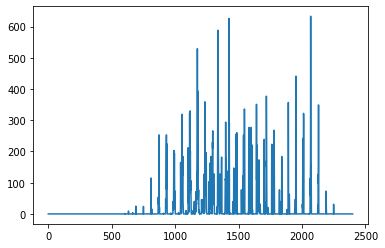

In [527]:
plt.plot( cnt_in)


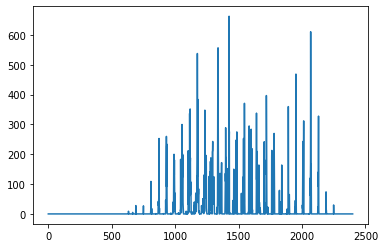

In [528]:
plt.plot(cnt_out)


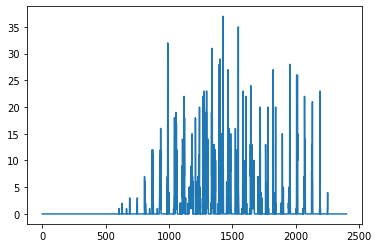

In [529]:
heat = abs(cnt_out-cnt_in)
plt.plot(heat)

In [530]:
df['heat'] = heat
df

idx        ll          rl          ru        lu  heat
0       [0, 0]  1.153828  103.569491   103.57773  1.162194   0.0
1       [0, 1]    1.1539   103.57773   103.58597  1.162267   0.0
2       [0, 2]  1.153973   103.58597   103.59421   1.16234   0.0
3       [0, 3]  1.154045   103.59421   103.60245  1.162412   0.0
4       [0, 4]  1.154118   103.60245  103.610692  1.162485   0.0
...        ...       ...         ...         ...       ...   ...
2395  [39, 55]  1.482304  104.020236  104.028504  1.490717   0.0
2396  [39, 56]  1.482395  104.028504  104.036773  1.490808   0.0
2397  [39, 57]  1.482487  104.036773  104.045042    1.4909   0.0
2398  [39, 58]  1.482578  104.045042  104.053312  1.490992   0.0
2399  [39, 59]  1.482669  104.053312  104.061583  1.491084   0.0

[2400 rows x 6 columns]

In [531]:
delete=[]
for i in excepts_list:
    heat[i] ==0.1
for i in range(0,2400):
    if heat[i]==0:
        delete.append(i)
print(len(delete))
heat = np.delete(heat,delete)

1896


In [532]:
heat.shape

(504,)

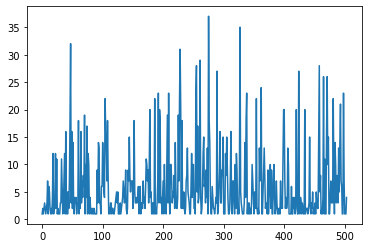

In [533]:
plt.plot(heat)

In [534]:
for i in delete:
    df['heat'][i] = False
df

/tmp/ipykernel_217747/801286535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['heat'][i] = False


idx        ll          rl          ru        lu   heat
0       [0, 0]  1.153828  103.569491   103.57773  1.162194  False
1       [0, 1]    1.1539   103.57773   103.58597  1.162267  False
2       [0, 2]  1.153973   103.58597   103.59421   1.16234  False
3       [0, 3]  1.154045   103.59421   103.60245  1.162412  False
4       [0, 4]  1.154118   103.60245  103.610692  1.162485  False
...        ...       ...         ...         ...       ...    ...
2395  [39, 55]  1.482304  104.020236  104.028504  1.490717  False
2396  [39, 56]  1.482395  104.028504  104.036773  1.490808  False
2397  [39, 57]  1.482487  104.036773  104.045042    1.4909  False
2398  [39, 58]  1.482578  104.045042  104.053312  1.490992  False
2399  [39, 59]  1.482669  104.053312  104.061583  1.491084  False

[2400 rows x 6 columns]

In [546]:
s = pd.Series(heat)

(array([301.,  84.,  38.,  31.,  17.,  16.,   8.,   5.,   2.,   2.]),
 array([ 1. ,  4.6,  8.2, 11.8, 15.4, 19. , 22.6, 26.2, 29.8, 33.4, 37. ]),
 <BarContainer object of 10 artists>)

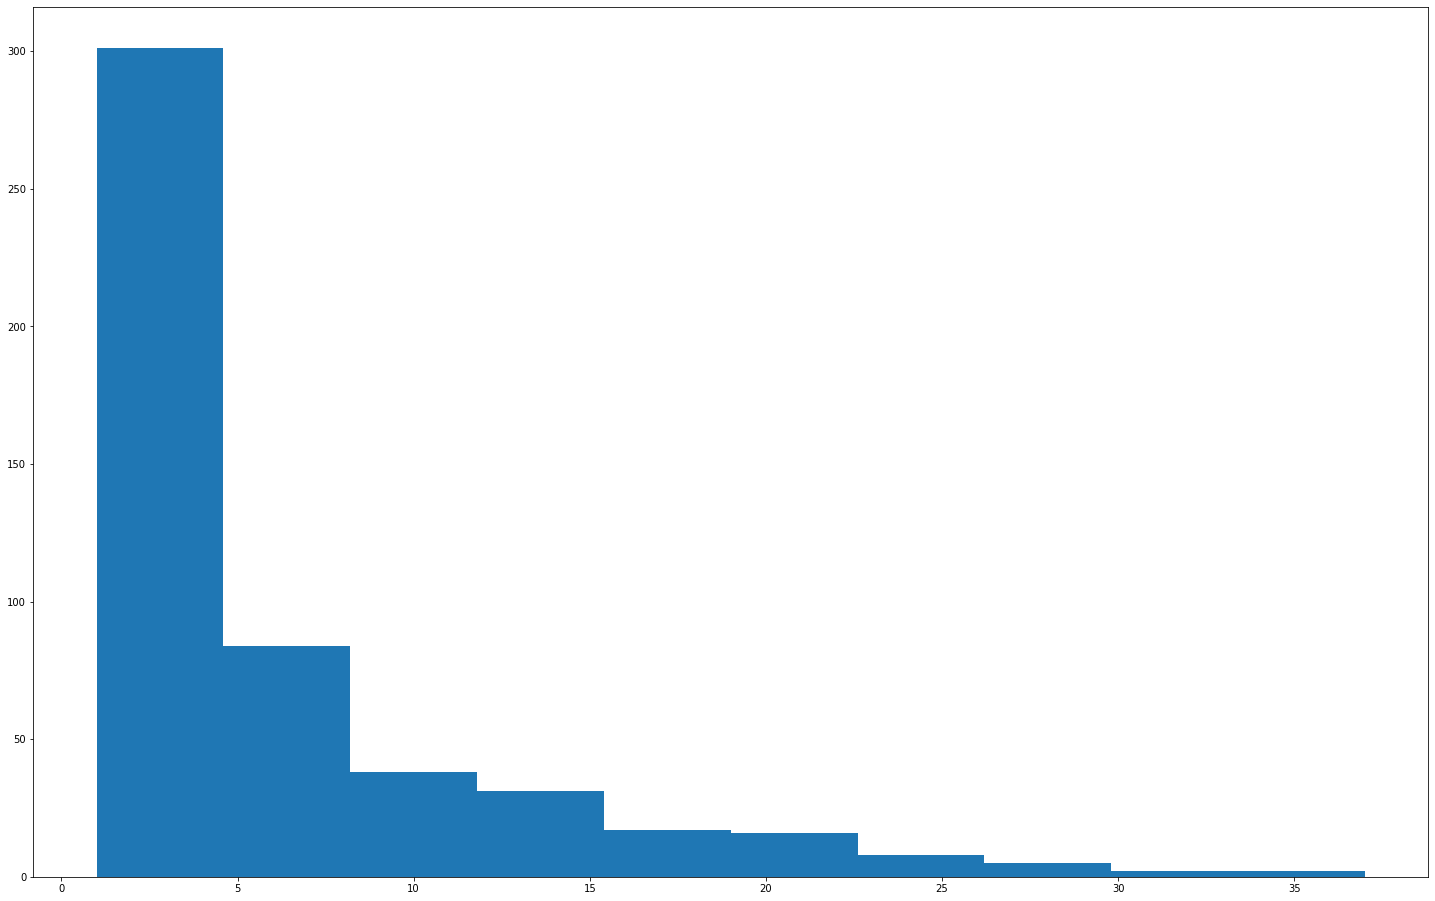

In [550]:
plt.figure(figsize=(25,16))

plt.hist(heat)

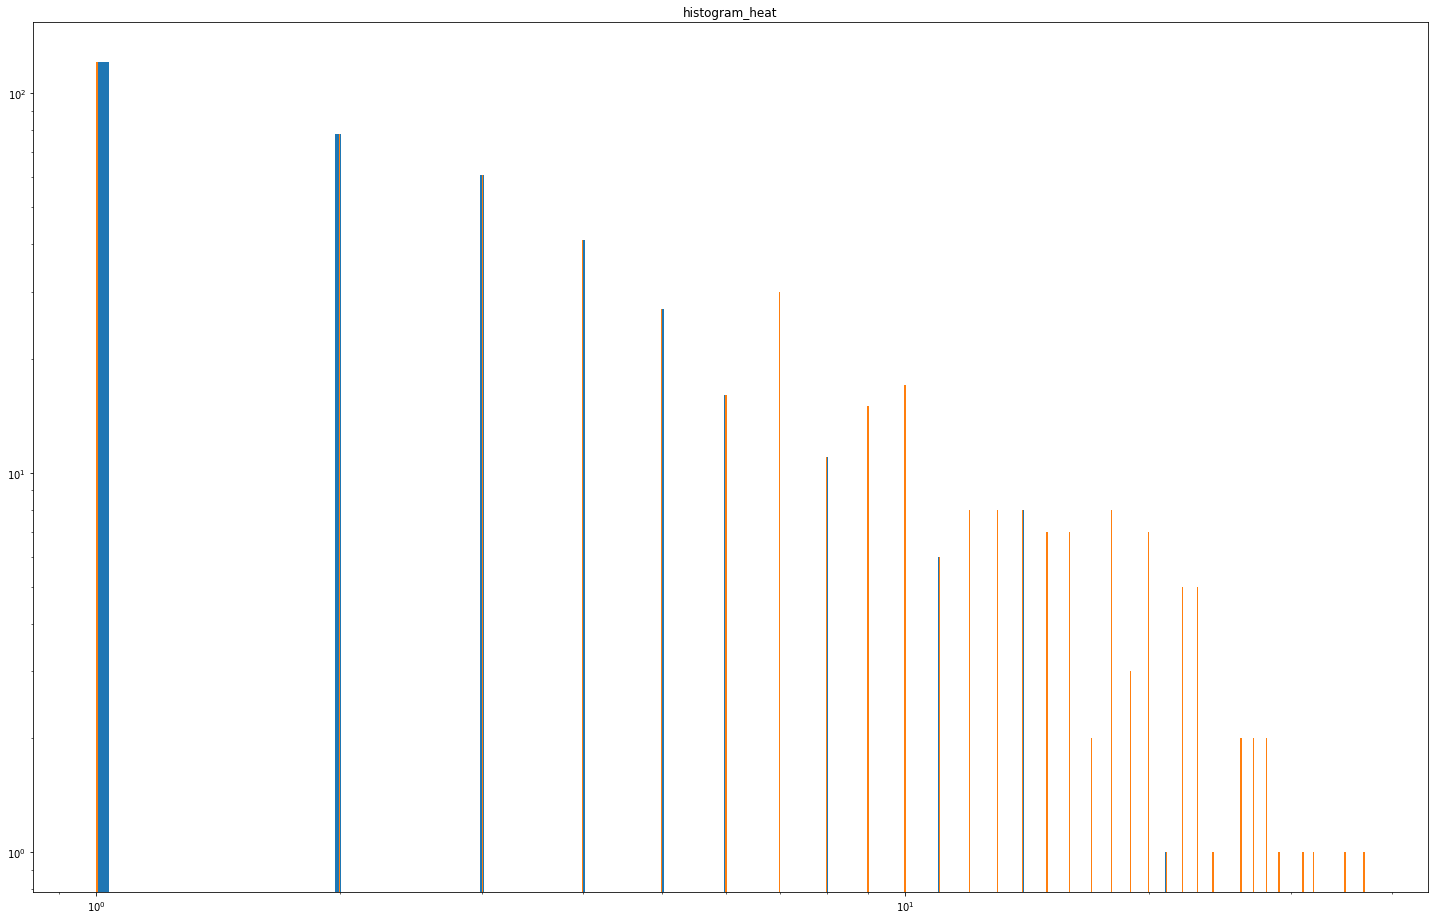

In [548]:
plt.figure(figsize=(25,16))
hist, bins, _ = plt.hist(s, bins=1000)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(heat, bins = logbins)
plt.title("histogram_heat") 
#plt.savefig('./Maps/'+City_Name+'/hist_of_heat_'+City_Name+'_'+str(epsilon* kms_per_radian)+'.png')
plt.xscale('log')
plt.yscale('log')
plt.show()

Calculating best minimal value for power law fit
alpha=  9.049769108001223   sigma=  2.4270967072939937


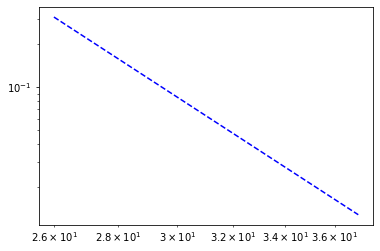

In [544]:
import powerlaw
fit = powerlaw.Fit(heat)
fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
fit.plot_pdf( color= 'b')

print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)

In [536]:
df

idx        ll          rl          ru        lu   heat
0       [0, 0]  1.153828  103.569491   103.57773  1.162194  False
1       [0, 1]    1.1539   103.57773   103.58597  1.162267  False
2       [0, 2]  1.153973   103.58597   103.59421   1.16234  False
3       [0, 3]  1.154045   103.59421   103.60245  1.162412  False
4       [0, 4]  1.154118   103.60245  103.610692  1.162485  False
...        ...       ...         ...         ...       ...    ...
2395  [39, 55]  1.482304  104.020236  104.028504  1.490717  False
2396  [39, 56]  1.482395  104.028504  104.036773  1.490808  False
2397  [39, 57]  1.482487  104.036773  104.045042    1.4909  False
2398  [39, 58]  1.482578  104.045042  104.053312  1.490992  False
2399  [39, 59]  1.482669  104.053312  104.061583  1.491084  False

[2400 rows x 6 columns]

In [537]:
np.max(heat)

37.0

In [538]:
resolution = (256/int(np.max(heat)))
print(resolution)

6.918918918918919


In [539]:
m2 = folium.Map(location=(p_4326[0], p_4326[1]), zoom_start=11) # folium.Map 은 (lat, lng) 로 location 을 받음에 유의!

for x, y in itertools.product(range(n2), range(n1)):
    
    if df['heat'][60*x+y] == False:
        continue
        
    grid_lower_l = transformer_5186_4326.transform(p_y_5186 + (x + 0) * meters, p_x_5186 + (y + 0) * meters)
    grid_lower_r = transformer_5186_4326.transform(p_y_5186 + (x + 1) * meters, p_x_5186 + (y + 0) * meters)
    grid_upper_r = transformer_5186_4326.transform(p_y_5186 + (x + 1) * meters, p_x_5186 + (y + 1) * meters)
    grid_upper_l = transformer_5186_4326.transform(p_y_5186 + (x + 0) * meters, p_x_5186 + (y + 1) * meters)
    
    folium.PolyLine([grid_upper_l,grid_upper_r], color="black", weight=1, opacity=0.5).add_to(m2)
    folium.PolyLine([grid_lower_r,grid_upper_r], color="black", weight=1, opacity=0.5).add_to(m2)
    folium.PolyLine([grid_lower_l,grid_upper_l], color="black", weight=1, opacity=0.5).add_to(m2)
    folium.PolyLine([grid_lower_l,grid_lower_r], color="black", weight=1, opacity=0.5).add_to(m2)
    colors2 = 'ff' + format(int(256-resolution*df['heat'][60*x+y]),'x') + format(int(256-resolution*df['heat'][60*x+y]),'x')
#    if df['heat'][60*x+y]<25:
#        continue
    if df['heat'][60*x+y]==np.max(heat):
        colors2 = 'ff0000'

    folium.CircleMarker(
        location=[(grid_lower_l[0]+grid_upper_r[0])/2,(grid_lower_l[1]+grid_upper_r[1])/2],
        weight=15,
        color = '#'+colors2,
        radius=5,
#        fill=True,
#        fill_color='#'+colors2,
    ).add_to(m2)
    

In [541]:
m2.save("Singapore_Grid"+str(meters)+"Heat"+".html")

m2

# Heat map color unification
# Feature selection problems ( Validation )
# Various grid length